# 비디오와 정량 지표 변화 같이 나타내기

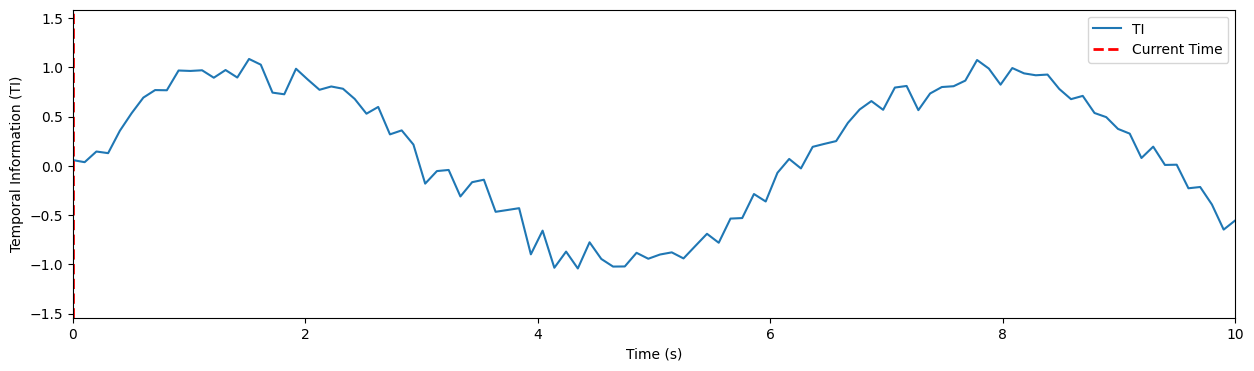

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# 예제 데이터
fps = 10
duration = 10 # 초
frames = fps * duration
x = np.linspace(0, duration, frames)
ti = np.sin(x) + np.random.normal(0, 0.1, size=frames) # 예시 TI 값

# 그래프 세팅
fig, ax = plt.subplots(figsize=(15, 4))
line, = ax.plot(x, ti, label='TI')
cursor_line = ax.axvline(x=0, color='r', linestyle='--', linewidth=2, label='Current Time')

ax.set_xlim(0, duration)
ax.set_ylim(min(ti)-0.5, max(ti)+0.5)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Temporal Information (TI)')
ax.legend()

# 🔧 수정된 update 함수
def update(frame_idx):
    current_time = frame_idx / fps
    cursor_line.set_xdata([current_time, current_time]) # 반드시 리스트로
    return cursor_line,

# 애니메이션 만들기
ani = animation.FuncAnimation(fig, update, frames=frames, interval=1000/fps, blit=False)

# Jupyter에서 출력
HTML(ani.to_jshtml())

In [11]:
url = 'https://www.youtube.com/watch?v=2SATljljXCY'
import utils, cv2
cap = utils.openVideoStream(url)
utils.extractFrames(cap, 0, None, cap.get(cv2.CAP_PROP_FPS), './tmp')

'https://www.youtube.com/watch?v=2SATljljXCY'에서 30fps 비디오 스트림 URL을 가져오는 중...
⚠️ 30fps 스트림 없음 → 최대 화질로 fallback
🎥 선택된 해상도: 1080p @ 25.0fps
URL: https://manifest.googlevideo.com/api/manifest/hls_playlist/expire/1752683849/ei/6YB3aI6hEoyRvcAPpb3esQc/ip/163.180.118.139/id/d920139639635c26/itag/270/source/youtube/requiressl/yes/ratebypass/yes/pfa/1/sgovp/clen%3D17734152%3Bdur%3D53.000%3Bgir%3Dyes%3Bitag%3D137%3Blmt%3D1607787835261618/rqh/1/hls_chunk_host/rr5---sn-n3cgv5qc5oq-bh2sr.googlevideo.com/xpc/EgVo2aDSNQ%3D%3D/met/1752662249,/mh/de/mm/31,26/mn/sn-n3cgv5qc5oq-bh2sr,sn-oguesn6s/ms/au,onr/mv/m/mvi/5/pcm2cms/yes/pl/19/rms/au,au/initcwndbps/7135000/bui/AY1jyLOJ08IYouMS72aYoIIbKmUV7F10omvprfJmjVpAEDbVP8aocl7it0pUz4sWL_ow-FOYdD12RWI1/spc/l3OVKasIiiVNaoWYBv6ULaT4Z4t2ohte7FnlgSjn5IirUSAlcr5LVv4SUpmZO94o/vprv/1/playlist_type/DVR/dover/13/txp/5535434/mt/1752662011/fvip/1/short_key/1/keepalive/yes/sparams/expire,ei,ip,id,itag,source,requiressl,ratebypass,pfa,sgovp,rqh,xpc,bui,spc,vprv,playlist_t

1200